### Importing Essential Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score

%matplotlib inline
plt.style.use('seaborn-white')

### Importing Dataset 

In [4]:
houseprice = pd.read_csv('Houseprice.csv')

### EDA of Data

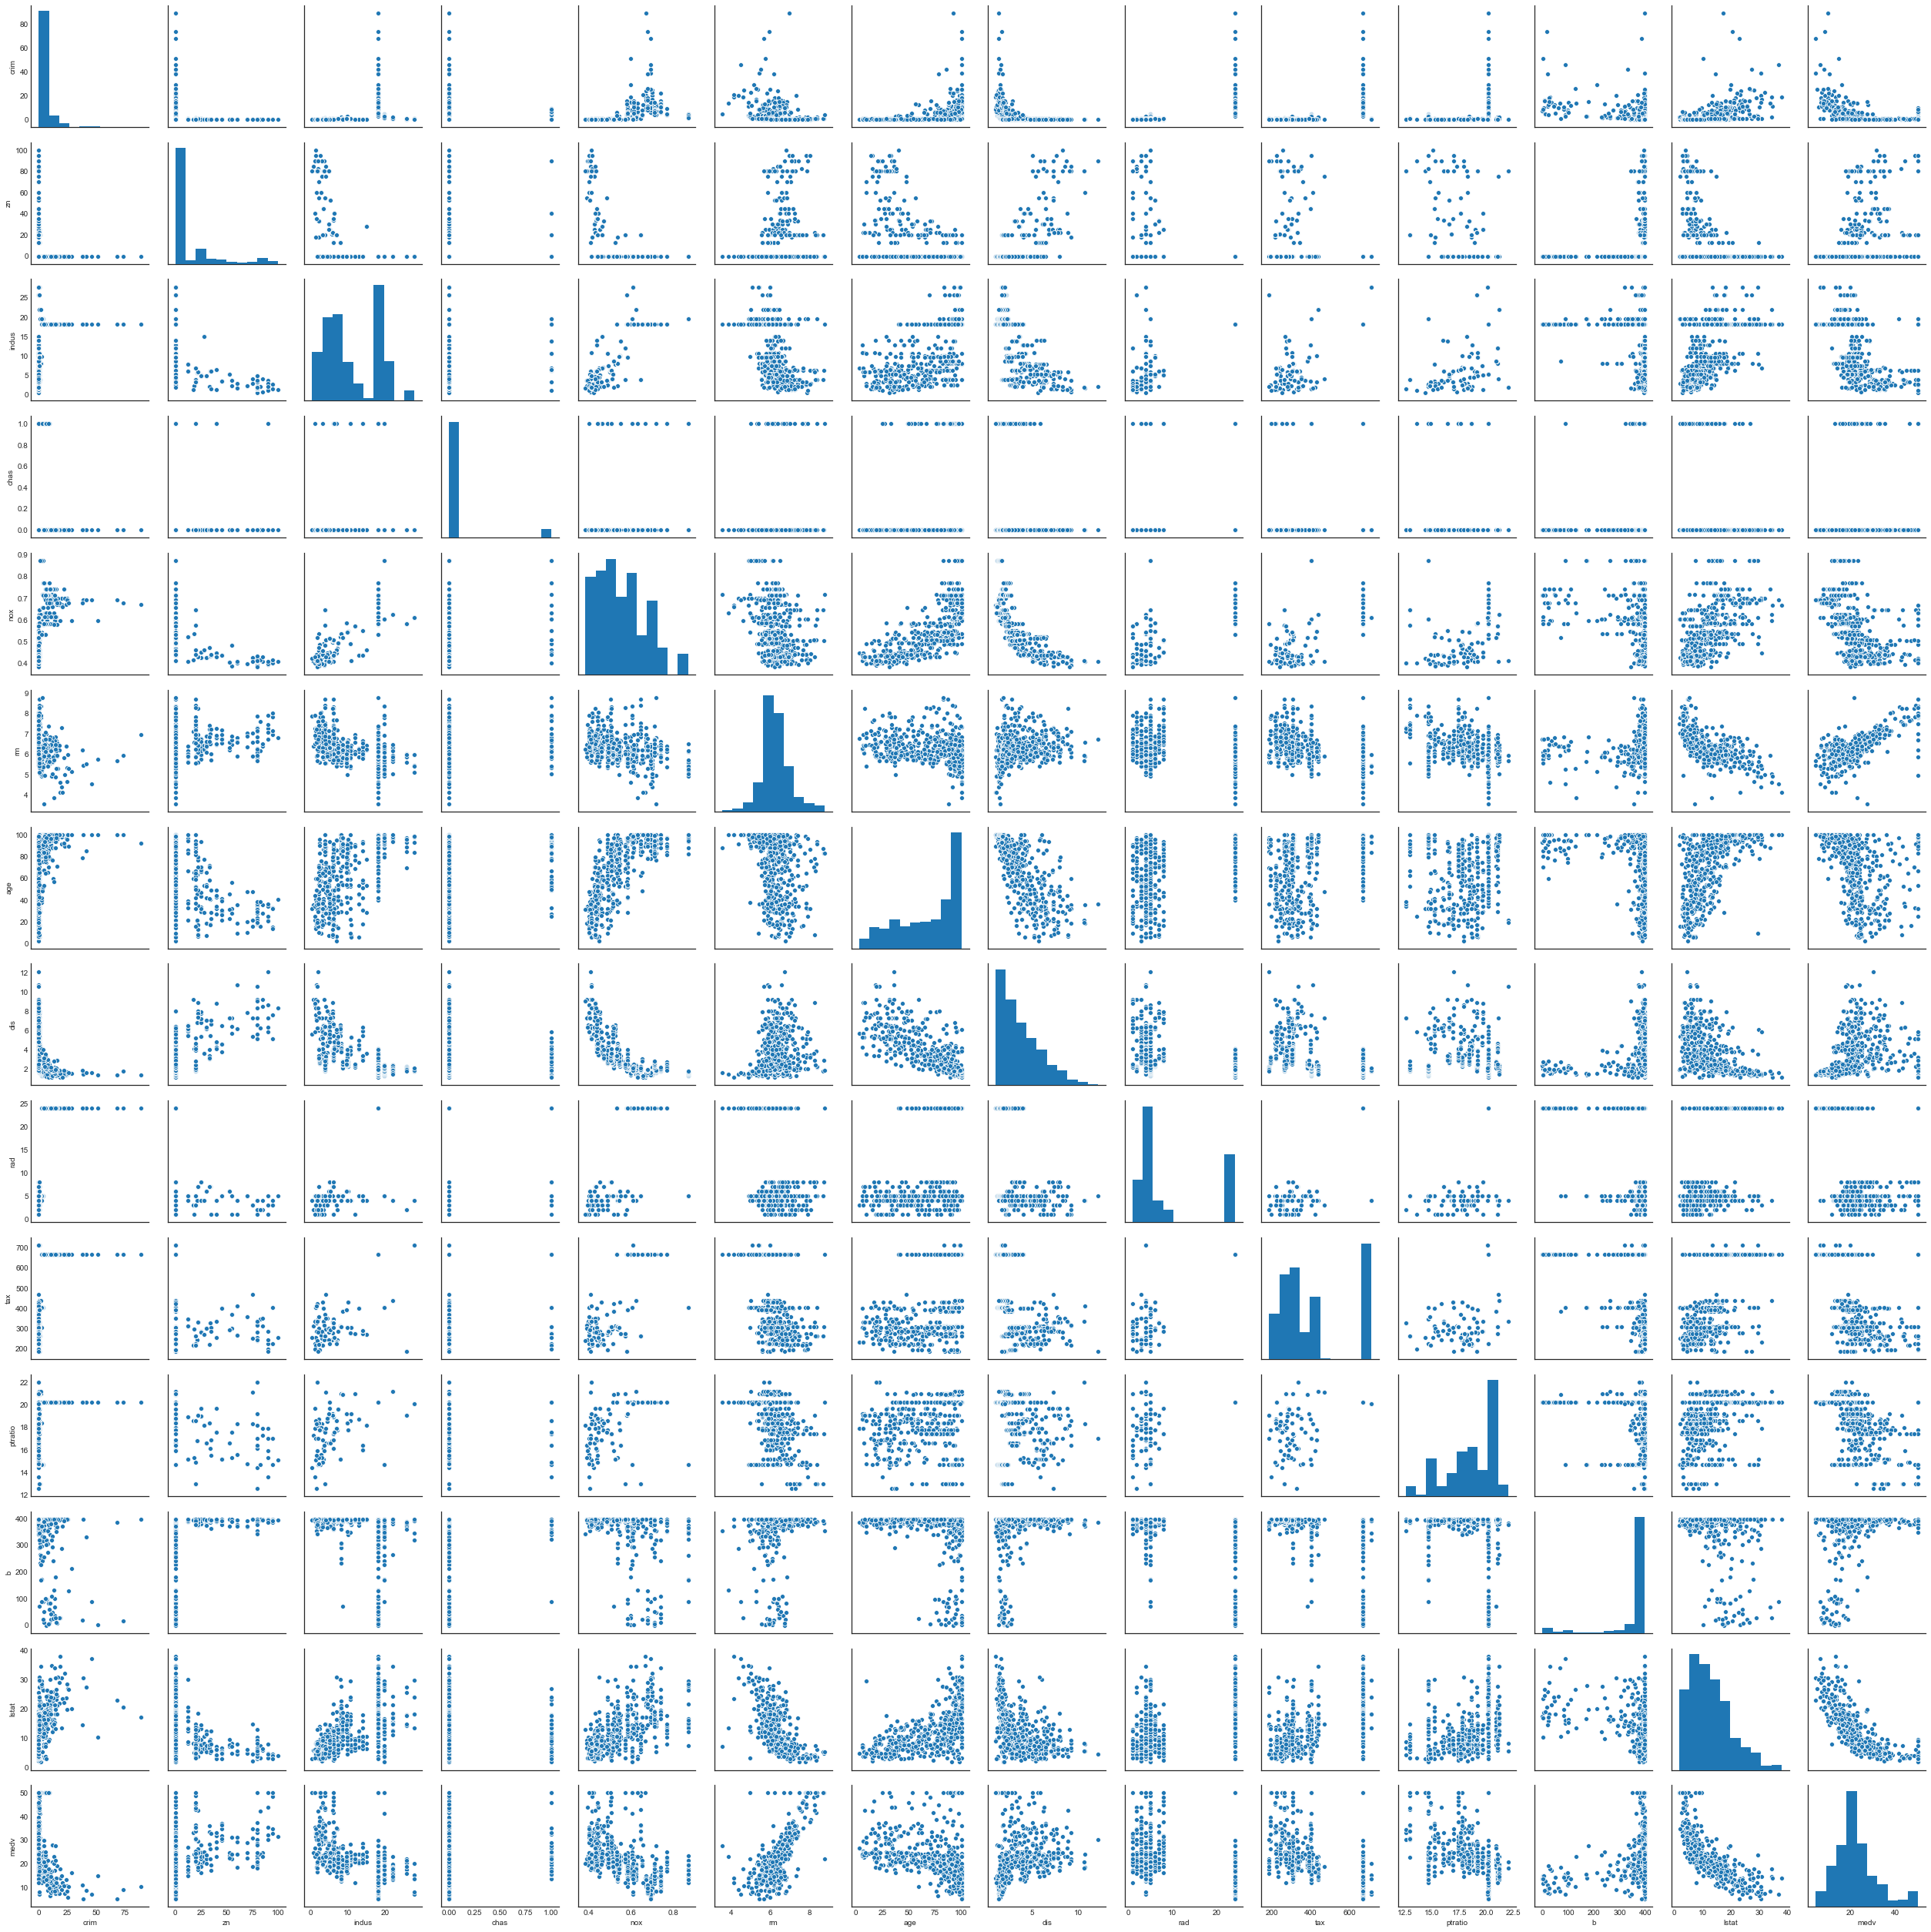

In [5]:
sns.pairplot(houseprice);

Strongest Correlations are:
rad    tax    0.910228
nox    dis    0.769230
indus  nox    0.763651
dtype: float64


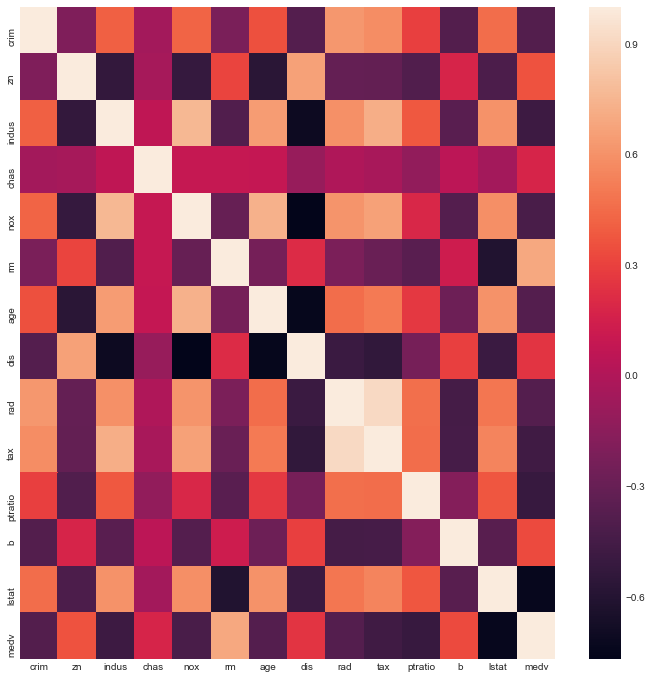

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))
# pass the axis to draw on
corr = houseprice.corr()
sns.heatmap(corr, ax=ax)

dat = pd.DataFrame(data = houseprice)
def get_pairs(dat):
    initials = set()
    cols = dat.columns
    for i in range(0, dat.shape[1]):
        for j in range(0, i+1):
            initials.add((cols[i], cols[j]))
    return initials

def get_strong_correlations(dat, n=13):
    correlation = dat.corr().abs().unstack()
    labels_drop = get_pairs(dat)
    correlation = correlation.drop(labels=labels_drop).sort_values(ascending=False)
    return correlation[0:n]

print("Strongest Correlations are:")
print(get_strong_correlations(dat, 3))

### Buliding 12 Simple Linear Regression Models

In [ ]:
from sklearn.model_selection import train_test_split
regr = skl_lm.LinearRegression()
col = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
for column in col:
    X = scale(houseprice[column], with_mean=True, with_std=False).reshape(-1,1)
    y = houseprice['medv']
    regr.fit(X,y)
    print(column, 'intercept:',regr.intercept_)
    print(column, 'coefficient value',regr.coef_)
    X = houseprice[[column]].as_matrix()
    y = houseprice['medv']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    regr = skl_lm.LinearRegression()
    reg = regr.fit(X_train,y_train)
    RSS = np.sum((y_test - regr.predict(X_test))**2)
    print(column, 'residual values', RSS)
    test_accuracy = r2_score(y_test, regr.predict(X_test))
    print (column, 'test accuracy is:', test_accuracy)
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X,X*regr.coef_+regr.intercept_,'green')
    plt.xlabel(column)
    plt.ylabel('medv')

In [51]:
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

19.538759340828822

### Multi Linear Regression Model using all 12 predictors

In [ ]:
X = houseprice[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']].as_matrix()
y = houseprice['medv']

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

Y = regr.predict(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
regr = skl_lm.LinearRegression()
reg = regr.fit(X_train,y_train)
RSS = np.sum((y_test - regr.predict(X_test))**2)
print('residual values', RSS)
test_accuracy = r2_score(y_test, regr.predict(X_test))
print ('Test accuracy is:', test_accuracy)

In [ ]:
axisx = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'multi']
axisy = (9761.417, 9552.995, 8311.2068, 12091.3, 9119.60, 6133.42, 9492.40, 10879.97, 10089.68, 8692.942, 8157.337, 10218.819, 5791.00, 3270.651)
plt.scatter(axisx, axisy)

### Conclusion 
From the above as we see the testing accuracy for the multi linear regression is 0.71122 and when we go through the data of the simple linear regressions lstat has the highest accuracy in all the simple linear regression of 0.48 and all other 12 simple linear regressions have the testing accuracy less than the lstat. Hence the multi linear regression has better testing accuracy.